### Take - Home Exam 
Betul Ozturan

## Task 1
 Integrate information from the “job_url_data” folder into one dictionary. The keys of the dictionary are individual urls scraped from the website, and the values are the earliest date that the corresponding urls were scraped. Save the results into a json file. How many unique job urls have been collected between May 17, 2022 and May 23, 2022? 

In [6]:
import pandas as pd
import re # regular expressions
import json

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import os 


In [9]:
os.chdir('/content/gdrive/MyDrive/2022 Computational Sociology/compsoc')

In [11]:
# create a list of of file names in the folders
file_list = os.listdir('indeed_scraped_data/job_url_data')

In [12]:
file_list

['job_urls_for_parsehub_5172022_v4.csv',
 'job_urls_for_parsehub_5172022_v3.csv',
 'job_urls_for_parsehub_5172022_v2.csv',
 'job_urls_for_parsehub_5172022_v5.csv',
 'job_urls_for_parsehub_5172022_v1.csv',
 'job_urls_for_parsehub_5182022_v1.csv',
 'job_urls_for_parsehub_5192022_v2.csv',
 'job_urls_for_parsehub_5192022_v1.csv',
 'job_urls_for_parsehub_5202022_v1.csv',
 'job_urls_for_parsehub_5202022_v2.csv',
 'job_urls_for_parsehub_5212022_v2.csv',
 'job_urls_for_parsehub_5212022_v1.csv',
 'job_urls_for_parsehub_5222022_v2.csv',
 'job_urls_for_parsehub_5222022_v1.csv',
 'job_urls_for_parsehub_5232022_v1.csv',
 'job_urls_for_parsehub_5232022_v2.csv']

In [ ]:
#file_list.remove('.DS_Store') # remove DS_Store

ValueError: ignored

In [13]:
file_list[1][23:25]

'17'

In [ ]:
#file_dates=[]
#for i in file_list: 
#    file = i[22] + '/' + i[23:25] + '/' + i[25:29]
#    file_dates.append(file)

In [14]:
file_dates=[]
for i in file_list: 
    file = i[22:29]
    file_dates.append(file)

In [15]:
file_dates

['5172022',
 '5172022',
 '5172022',
 '5172022',
 '5172022',
 '5182022',
 '5192022',
 '5192022',
 '5202022',
 '5202022',
 '5212022',
 '5212022',
 '5222022',
 '5222022',
 '5232022',
 '5232022']

In [16]:
# add the path to file names because it is inside our working directory 
file_list2=[]
for i in file_list: 
    file = "indeed_scraped_data/job_url_data/" + i
    file_list2.append(file)

In [17]:
file_list2

['indeed_scraped_data/job_url_data/job_urls_for_parsehub_5172022_v4.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5172022_v3.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5172022_v2.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5172022_v5.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5172022_v1.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5182022_v1.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5192022_v2.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5192022_v1.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5202022_v1.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5202022_v2.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5212022_v2.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5212022_v1.csv',
 'indeed_scraped_data/job_url_data/job_urls_for_parsehub_5222022_v2.csv',
 'indeed_scraped_data/job_url_data/job

In [18]:
from pandas.core.groupby.groupby import DataFrame

file_nd = pd.DataFrame(list(zip(file_dates, file_list2)),
               columns =['Date','Name'])
file_nd

,Date,Name
0,5172022,indeed_scraped_data/job_url_data/job_urls_for_...
1,5172022,indeed_scraped_data/job_url_data/job_urls_for_...
2,5172022,indeed_scraped_data/job_url_data/job_urls_for_...
3,5172022,indeed_scraped_data/job_url_data/job_urls_for_...
4,5172022,indeed_scraped_data/job_url_data/job_urls_for_...
5,5182022,indeed_scraped_data/job_url_data/job_urls_for_...
6,5192022,indeed_scraped_data/job_url_data/job_urls_for_...
7,5192022,indeed_scraped_data/job_url_data/job_urls_for_...
8,5202022,indeed_scraped_data/job_url_data/job_urls_for_...
9,5202022,indeed_scraped_data/job_url_data/job_urls_for_...


In [ ]:
len(file_nd)


16

In [19]:
## read the files

keys = []
values =[]

for i in range(0,len(file_nd)):
    keys.append(pd.read_csv(file_nd['Name'][i], index_col=None, header=0))
    values.append(file_nd['Date'][i])


In [206]:
values

['5172022',
 '5172022',
 '5172022',
 '5172022',
 '5172022',
 '5182022',
 '5192022',
 '5192022',
 '5202022',
 '5202022',
 '5212022',
 '5212022',
 '5222022',
 '5222022',
 '5232022',
 '5232022']

In [20]:
for i in range(len(keys)): 
  keys[i]['date'] = values[i]

In [21]:
keys_data = pd.concat(keys, axis=0, ignore_index=True)

In [22]:
keys_data

,job_url,date
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022
1,https://www.indeed.com/rc/clk?jk=40e614effe237...,5172022
2,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022
3,https://www.indeed.com/rc/clk?jk=79bcb4432d5d3...,5172022
4,https://www.indeed.com/rc/clk?jk=751e4a1f89658...,5172022
...,...,...
60976,https://www.indeed.com/rc/clk?jk=c239f8c996a77...,5232022
60977,https://www.indeed.com/rc/clk?jk=a8944c2603abb...,5232022
60978,https://www.indeed.com/company/Summit-Healthca...,5232022
60979,https://www.indeed.com/company/StyleRemains-Gm...,5232022


In [201]:
#from datetime import datetime


#keys_data['date'] = datetime.strptime(keys_data['date'], '%m%d%Y')


TypeError: ignored

In [23]:
keys_data.sort_values('date', axis=0, ascending=False) 
# sort by descending order so duplicated ones in dictionary will be the first complied ones

,job_url,date
60980,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5232022
53964,https://www.indeed.com/rc/clk?jk=31fc745dc60f9...,5232022
53962,https://www.indeed.com/rc/clk?jk=112fee9538a17...,5232022
53961,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5232022
53960,https://www.indeed.com/rc/clk?jk=438471b4ab50c...,5232022
...,...,...
8783,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022
8782,https://www.indeed.com/rc/clk?jk=7fe2bbd7f64b6...,5172022
8781,https://www.indeed.com/rc/clk?jk=a8c7af307db64...,5172022
8780,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022


In [24]:
url_dict = dict(keys_data.values)


In [25]:
print(len(url_dict))
print(len(keys_data))

21260
60981


There are 21260 unique urls in the files

In [26]:
# save into json file and how many unique urls are there
import json

with open('data.json', 'w') as fp:
    json.dump(url_dict, fp)

## Task 2 
Clean and integrate information from the “job_info_data” folder into one data frame. Files from this subfolder might have two different formats. Some of them are csv files, while others are json files. The columns might also be named differently. Find ways to read each of the files into pandas, drop records with missing job titles and/or missing job descriptions, and combine them into one dataframe. Lastly, drop records with duplicate job urls, and then save them into a separate csv file. How many unique jobs are there in the cleaned dataframe? 


In [ ]:
## Add dates from the file names into the job_info_data 
## try bonus task (if you can, ignore task 2 and dates)

In [27]:
# read file names for info folder
import os
info_data = os.listdir('indeed_scraped_data/job_info_data')

In [28]:
info_data
#info_data.remove('.DS_Store')

['parsehub_5172022_v1.csv',
 'parsehub_5172022_v2.csv',
 'parsehub_5182022_v1.csv',
 'parsehub_5182022_v2.json',
 'parsehub_5192022_v1.csv',
 'parsehub_5192022_v2.csv',
 'parsehub_5202022_v1.csv',
 'parsehub_5202022_v2.json',
 'parsehub_5212022_v1.csv',
 'parsehub_5212022_v2.csv',
 'parsehub_5222022_v1.csv',
 'parsehub_5222022_v2.csv',
 'parsehub_5222022_v4.csv',
 'parsehub_5222022_v3.csv',
 'parsehub_5222022_v5.csv',
 'parsehub_5222022_v6.csv',
 'parsehub_5232022_v1.csv',
 'parsehub_5232022_v2.csv']

In [32]:
info_dates=[]
for i in info_data: 
    file = i[9:16]
    info_dates.append(file)

info_dates

['5172022',
 '5172022',
 '5182022',
 '5182022',
 '5192022',
 '5192022',
 '5202022',
 '5202022',
 '5212022',
 '5212022',
 '5222022',
 '5222022',
 '5222022',
 '5222022',
 '5222022',
 '5222022',
 '5232022',
 '5232022']

In [33]:
info_data2=[]
for i in info_data: 
    file = "indeed_scraped_data/job_info_data/" + i
    info_data2.append(file)

In [34]:
info_data2[-1]

'indeed_scraped_data/job_info_data/parsehub_5232022_v2.csv'

In [35]:
info_nd = pd.DataFrame(list(zip(info_dates, info_data2)),
               columns =['Date','Name'])
info_nd

,Date,Name
0,5172022,indeed_scraped_data/job_info_data/parsehub_517...
1,5172022,indeed_scraped_data/job_info_data/parsehub_517...
2,5182022,indeed_scraped_data/job_info_data/parsehub_518...
3,5182022,indeed_scraped_data/job_info_data/parsehub_518...
4,5192022,indeed_scraped_data/job_info_data/parsehub_519...
5,5192022,indeed_scraped_data/job_info_data/parsehub_519...
6,5202022,indeed_scraped_data/job_info_data/parsehub_520...
7,5202022,indeed_scraped_data/job_info_data/parsehub_520...
8,5212022,indeed_scraped_data/job_info_data/parsehub_521...
9,5212022,indeed_scraped_data/job_info_data/parsehub_521...


In [52]:
# split info files into json and csv

json_files =[]
for i in range(len(info_nd['Name'])):
    x= re.search(".*json$", info_nd['Name'][i])
    if x != None:
        json_files.append(info_nd.loc[i])
print(json_files)



[Date                                              5182022
Name    indeed_scraped_data/job_info_data/parsehub_518...
Name: 3, dtype: object, Date                                              5202022
Name    indeed_scraped_data/job_info_data/parsehub_520...
Name: 7, dtype: object]


In [57]:
json_files[1][1]


'indeed_scraped_data/job_info_data/parsehub_5202022_v2.json'

In [58]:
csv_files =[]
for i in range(len(info_nd['Name'])):
    x= re.search(".*csv$", info_nd['Name'][i])
    if x != None:
        csv_files.append(info_nd.loc[i])
print(csv_files)

[Date                                              5172022
Name    indeed_scraped_data/job_info_data/parsehub_517...
Name: 0, dtype: object, Date                                              5172022
Name    indeed_scraped_data/job_info_data/parsehub_517...
Name: 1, dtype: object, Date                                              5182022
Name    indeed_scraped_data/job_info_data/parsehub_518...
Name: 2, dtype: object, Date                                              5192022
Name    indeed_scraped_data/job_info_data/parsehub_519...
Name: 4, dtype: object, Date                                              5192022
Name    indeed_scraped_data/job_info_data/parsehub_519...
Name: 5, dtype: object, Date                                              5202022
Name    indeed_scraped_data/job_info_data/parsehub_520...
Name: 6, dtype: object, Date                                              5212022
Name    indeed_scraped_data/job_info_data/parsehub_521...
Name: 8, dtype: object, Date               

In [59]:
# take the file names out of list of lists
def flatten(l):
    return [item for sublist in l for item in sublist]

In [60]:
#csv_files2= flatten(csv_files)
#json_files2= flatten(json_files)

In [66]:
csv_files[4][1]
# read csv files
data_csv=[]

for i in range(len(csv_files)):
    df = pd.read_csv(csv_files[i][1], index_col=None, header=0)
    data_csv.append(df)

dicts = []


'indeed_scraped_data/job_info_data/parsehub_5192022_v2.csv'

In [71]:
keys_csv = []
values_csv =[]

for i in range(0,len(csv_files)):
    keys_csv.append(pd.read_csv(csv_files[i][1], index_col=None, header=0))
    values_csv.append(csv_files[i][0])


In [72]:
for i in range(len(keys_csv)): 
  keys_csv[i]['date'] = values_csv[i]

In [73]:
info_csv = pd.concat(keys_csv, axis=0, ignore_index=True)


In [76]:
info_csv.head()

,lnks_link,lnks_job_title,lnks_company,lnks_company_url,lnks_company_location,lnks_job_description,date
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...,5172022
1,https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...,Access Specialist,Pikes Peak Community College,https://www.indeed.com/cmp/Pikes-Peak-Communit...,"Colorado Springs, CO 80906",Tracking Code: 40069\nWork Type: Full-time\nCa...,5172022
2,https://www.indeed.com/rc/clk?jk=ceee36181304b...,Clinic Registered Nurse - Family Practice - FT,Memorial Regional Health,https://www.indeed.com/cmp/Memorial-Regional-H...,"Craig, CO 81625",Position Purpose: The Registered Nurse is resp...,5172022
3,https://www.indeed.com/rc/clk?jk=e9735aea38be9...,Sr Wetland Scientist/Permitting Specialist,Jacobs,https://www.indeed.com/cmp/Jacobs?campaignid=m...,"Wethersfield, CT 06109",Our People & Places Solutions business – reinf...,5172022
4,https://www.indeed.com/company/Swiss-American-...,Quality Assurance Engineer,Swiss American CDMO,https://www.indeed.com/cmp/Swiss-American-Cdmo...,"Carrollton, TX 75006",QUALITY ASSURANCE ENGINEER II\nPosition Summar...,5172022


In [77]:
info_csv = info_csv.dropna(subset=['lnks_job_title','lnks_job_description'])

,lnks_link,lnks_job_title,lnks_company,lnks_company_url,lnks_company_location,lnks_job_description,date
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...,5172022
1,https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...,Access Specialist,Pikes Peak Community College,https://www.indeed.com/cmp/Pikes-Peak-Communit...,"Colorado Springs, CO 80906",Tracking Code: 40069\nWork Type: Full-time\nCa...,5172022
2,https://www.indeed.com/rc/clk?jk=ceee36181304b...,Clinic Registered Nurse - Family Practice - FT,Memorial Regional Health,https://www.indeed.com/cmp/Memorial-Regional-H...,"Craig, CO 81625",Position Purpose: The Registered Nurse is resp...,5172022
3,https://www.indeed.com/rc/clk?jk=e9735aea38be9...,Sr Wetland Scientist/Permitting Specialist,Jacobs,https://www.indeed.com/cmp/Jacobs?campaignid=m...,"Wethersfield, CT 06109",Our People & Places Solutions business – reinf...,5172022
4,https://www.indeed.com/company/Swiss-American-...,Quality Assurance Engineer,Swiss American CDMO,https://www.indeed.com/cmp/Swiss-American-Cdmo...,"Carrollton, TX 75006",QUALITY ASSURANCE ENGINEER II\nPosition Summar...,5172022
...,...,...,...,...,...,...,...
35194,https://www.indeed.com/rc/clk?jk=019e3da349970...,"Risk & Regulatory Business Process, Controls, ...",PRICE WATERHOUSE COOPERS,https://www.indeed.com/cmp/Pwc?campaignid=mobv...,"Las Vegas, NV 89169","A career within Internal Audit services, will ...",5232022
35196,https://www.indeed.com/rc/clk?jk=315e7cf866cab...,Healthcare Specialist,Stericycle Inc,https://www.indeed.com/cmp/Stericycle?campaign...,"Charleston, SC",About Us:\nWould you like to have a career tha...,5232022
35197,https://www.indeed.com/rc/clk?jk=81503395a0221...,BUSINESS MANAGER (FINANCIAL),"US Commander, Navy Installations","https://www.indeed.com/cmp/US-Commander,-Navy-...","Gulfport, MS",Duties\nApplies financial oversight for NAF fu...,5232022
35198,https://www.indeed.com/rc/clk?jk=6b8d48e17cdb5...,Dialysis Equipment Technician,Fresenius Medical Care,https://www.indeed.com/cmp/Fresenius-Medical-C...,"Denver, CO 80238",PURPOSE AND SCOPE:\nEntry level position focus...,5232022


In [78]:
json_files

[Date                                              5182022
 Name    indeed_scraped_data/job_info_data/parsehub_518...
 Name: 3, dtype: object,
 Date                                              5202022
 Name    indeed_scraped_data/job_info_data/parsehub_520...
 Name: 7, dtype: object]

In [86]:
data_json=[]
values_json=[]
for i in range(0,len(json_files)):
    with open(json_files[i][1],'r') as f:
          data = json.loads(f.read())
    df_nested_list = pd.json_normalize(data, record_path =['lnks'])
    data_json.append(df_nested_list)
    values_json.append(json_files[i][0])


In [87]:
len(data_json)==len(values_json)

True

In [88]:
for i in range(len(data_json)): 
  data_json[i]['date'] = values_json[i]

In [89]:
data_json = pd.concat(data_json, axis=0, ignore_index=True)

In [90]:
len(data_json)

,link,job_title,company,company_url,company_location,job_description,date
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,NaN,NaN,5182022
1,https://www.indeed.com/rc/clk?jk=a95cd2409de80...,NaN,NaN,NaN,NaN,NaN,5182022
2,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,NaN,NaN,5182022
3,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,NaN,NaN,5182022
4,https://www.indeed.com/rc/clk?jk=df119ccd5529f...,NaN,NaN,NaN,NaN,NaN,5182022
...,...,...,...,...,...,...,...
7687,https://www.indeed.com/rc/clk?jk=9d73d02c1e447...,NaN,NaN,NaN,NaN,NaN,5202022
7688,https://www.indeed.com/rc/clk?jk=fbef4e9cb7a93...,NaN,NaN,NaN,NaN,NaN,5202022
7689,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NaN,NaN,NaN,NaN,NaN,5202022
7690,https://www.indeed.com/rc/clk?jk=f2d758d956dcd...,NaN,NaN,NaN,NaN,NaN,5202022


In [91]:
data_json = data_json.dropna(subset=['job_title','job_description'])

In [93]:
len(data_json)

3806

In [94]:
data_json = pd.DataFrame(data_json)

In [97]:
print(data_json.keys())
print(info_csv.keys())

Index(['link', 'job_title', 'company', 'company_url', 'company_location',
       'job_description', 'date'],
      dtype='object')
Index(['lnks_link', 'lnks_job_title', 'lnks_company', 'lnks_company_url',
       'lnks_company_location', 'lnks_job_description', 'date'],
      dtype='object')


In [98]:
info_csv.rename(columns={'lnks_link' : 'link', 'lnks_job_title': 'job_title', 'lnks_company': 'company', 'lnks_company_url' : 'company_url',
       'lnks_company_location' : 'company_location', 'lnks_job_description' : 'job_description'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
info_csv.head()

,link,job_title,company,company_url,company_location,job_description,date
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Senior Audit Manager- Compliance (Remote),USAA,https://www.indeed.com/cmp/Usaa?campaignid=mob...,"Happy Valley Ranch, AZ",Purpose of Job We are seeking a talented Senio...,5172022
1,https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...,Access Specialist,Pikes Peak Community College,https://www.indeed.com/cmp/Pikes-Peak-Communit...,"Colorado Springs, CO 80906",Tracking Code: 40069\nWork Type: Full-time\nCa...,5172022
2,https://www.indeed.com/rc/clk?jk=ceee36181304b...,Clinic Registered Nurse - Family Practice - FT,Memorial Regional Health,https://www.indeed.com/cmp/Memorial-Regional-H...,"Craig, CO 81625",Position Purpose: The Registered Nurse is resp...,5172022
3,https://www.indeed.com/rc/clk?jk=e9735aea38be9...,Sr Wetland Scientist/Permitting Specialist,Jacobs,https://www.indeed.com/cmp/Jacobs?campaignid=m...,"Wethersfield, CT 06109",Our People & Places Solutions business – reinf...,5172022
4,https://www.indeed.com/company/Swiss-American-...,Quality Assurance Engineer,Swiss American CDMO,https://www.indeed.com/cmp/Swiss-American-Cdmo...,"Carrollton, TX 75006",QUALITY ASSURANCE ENGINEER II\nPosition Summar...,5172022


In [100]:
# combine them into one dataframe 
info_all = pd.concat([data_json, info_csv])

In [101]:
info_all_dup = info_all.drop_duplicates('link')

In [102]:
info_all_dup.head()
len(info_all_dup)

16303

There are 16303 unique job listings recorded in the files after dropping missing job descriptions and titles

## Task 3. 
Merge between “job_url_data” and “job_info_data”. What is the percentage of jobs that can be matched between these two data sources? How are the missing data (unmatched job urls) distributed by date? What about matched job urls? How many complete job listings were we able to collect each day? How would you interpret this result with respect to data quality? Does it mean that our data collection strategy is flawed and thus introduces non-random sampling biases? 


In [103]:
keys_data['link']= keys_data['job_url']

In [120]:
keys_data

,job_url,date,link
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,https://www.indeed.com/rc/clk?jk=40e614effe237...,5172022,https://www.indeed.com/rc/clk?jk=40e614effe237...
2,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,https://www.indeed.com/rc/clk?jk=79bcb4432d5d3...,5172022,https://www.indeed.com/rc/clk?jk=79bcb4432d5d3...
4,https://www.indeed.com/rc/clk?jk=751e4a1f89658...,5172022,https://www.indeed.com/rc/clk?jk=751e4a1f89658...
...,...,...,...
55707,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5232022,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
55708,https://www.indeed.com/rc/clk?jk=4c78c7807e27e...,5232022,https://www.indeed.com/rc/clk?jk=4c78c7807e27e...
55711,https://www.indeed.com/rc/clk?jk=0e8f96a6be975...,5232022,https://www.indeed.com/rc/clk?jk=0e8f96a6be975...
55712,https://www.indeed.com/rc/clk?jk=bd10340c8c24a...,5232022,https://www.indeed.com/rc/clk?jk=bd10340c8c24a...


In [119]:
keys_data = keys_data.drop_duplicates('link')

In [114]:
info_all_dup.head()

,link,job_title,company,company_url,company_location,job_description,date
5,https://www.indeed.com/rc/clk?jk=be4f78522cc9e...,Associate Director Data Management,Otsuka,https://www.indeed.com/cmp/Otsuka?campaignid=m...,"Princeton, NJ 08540",Job Summary\nOtsuka is a healthcare company dr...,5182022
6,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Safety and Health Specialist - Great Opportuni...,ACT-1 Government,https://www.indeed.com/cmp/Act--1-Government?c...,"Aiken, SC 29803",Great opportunity for an experienced Safety & ...,5182022
7,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Sr Material Technician,NaN,NaN,"Kearny, NJ 07032",Sr Material Technician opportunity with Kelly ...,5182022
8,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1st Assistant Engineer,American Seafoods Company,https://www.indeed.com/cmp/American-Seafoods?c...,United States,Title of Position: 1stAssistant Engineer\nStat...,5182022
9,https://www.indeed.com/rc/clk?jk=cc5536b8ea743...,"Director, Global Audits -Medical Devices & Com...",Catalent,https://www.indeed.com/cmp/Catalent-Pharma-Sol...,"Somerset, NJ 08873",As part of the Central Quality & Regulatory Af...,5182022


In [121]:
merged = pd.merge(keys_data, info_all_dup, on = 'link')

In [122]:
print(len(merged))
print(len(keys_data))
print(len(info_all_dup))

16303
21260
16303


In [127]:
merged.head()

,job_url,date_x,link,job_title,company,company_url,company_location,job_description,date_y
0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Safety and Health Specialist - Great Opportuni...,ACT-1 Government,https://www.indeed.com/cmp/Act--1-Government?c...,"Aiken, SC 29803",Great opportunity for an experienced Safety & ...,5182022
1,https://www.indeed.com/rc/clk?jk=79aca2b2b61ad...,5172022,https://www.indeed.com/rc/clk?jk=79aca2b2b61ad...,Compliance Specialist,WELLS FARGO BANK,https://www.indeed.com/cmp/Wells-Fargo?campaig...,"St. Louis, MO","At Wells Fargo, we are looking for talented pe...",5172022
2,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Manager Trainee,NaN,NaN,"Cedar Rapids, IA 52402","By clicking the “Apply” button, I understand t...",5182022
3,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Evening Nurse Supervisor Skilled Nursing (RN/L...,Salemhaven Nursing & Rehabilitation Center,https://www.indeed.com/cmp/Salemhaven-Nursing-...,"Salem, NH 03079","*$10,000 SIGN ON BONUS AND VERY GENEROUS SHIFT...",5182022
4,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,5172022,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Sr Project Data Manager,NaN,NaN,United States,Description\nSenior Project Data Manager\nCome...,5172022


In [132]:
from zmq.constants import NULL

merged['date'] = NULL
for i in range(len(merged)): 
  if merged['date_x'][i] <= merged['date_y'][i]:
    merged['date'][i] = merged['date_x'][i]
  else: 
    merged['date'][i] = merged['date_y'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [133]:
merged['date']

0        5172022
1        5172022
2        5172022
3        5172022
4        5172022
          ...   
16298    5222022
16299    5222022
16300    5222022
16301    5222022
16302    5222022
Name: date, Length: 16303, dtype: int64

We have found all job postings under job_info_data also under job_url_data. We could not match 4957 job urls with the job infos. 

In [136]:
days_count = merged.groupby('date').agg('job_url').count().reset_index()

In [137]:
days_count

,date,job_url
0,5172022,3905
1,5182022,1324
2,5192022,3790
3,5202022,4503
4,5212022,2113
5,5222022,668



## Interpretation
*   The distribution of data collection is not uniform. But I do not think that this is due to the method being flawed but I think it is because the new job postings do not have to be uniformly distributed. 



# Bonus Task 1. 
Using the merged dataset from Task 3, extract state information for each individual job based on the “company_location” column. Aggregate them by state, and create a state-level choropleth map to visualize the spatial distribution of compliance jobs. The map should be colored based on the total number of compliance jobs in each state. The boundaries of US states in geojson can be found here. Interpret the results. [You will get three extra points if you are able to finish this bonus task.] 


In [142]:
%pip install geopandas
%pip install rtree
%pip install shapely
%pip install folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
import geopandas as gpd
import rtree
import shapely
import folium

In [316]:
merged['company_location']

0                Aiken, SC 29803
1                  St. Louis, MO
2         Cedar Rapids, IA 52402
3                Salem, NH 03079
4                  United States
                  ...           
16298              Fairbanks, AK
16299        San Diego, CA 92101
16300                Chicago, IL
16301    Williamsville, NY 14221
16302            Omaha, NE 68131
Name: company_location, Length: 16303, dtype: object

In [145]:
state_count = merged.groupby('company_location').agg('job_url').count().reset_index()

In [318]:
states=[]
for i in range(len(merged['company_location'])): 
  states.append(re.findall(r'\b[A-Z]{2}\b', merged['company_location'][i]))

In [319]:
len(states)
states = pd.DataFrame(states)

In [320]:
states['count']= 1
states

,0,count
0,SC,1
1,MO,1
2,IA,1
3,NH,1
4,None,1
...,...,...
16298,AK,1
16299,CA,1
16300,IL,1
16301,NY,1


In [321]:
state_count = states.groupby(0).count().reset_index()

In [322]:
state_count

,0,count
0,AK,51
1,AL,179
2,AR,101
3,AZ,365
4,CA,1345
5,CO,446
6,CT,182
7,DC,153
8,DE,88
9,FL,744


In [323]:
states_gdf = gpd.read_file('states.geojson')

In [324]:
state_count['STUSPS'] = state_count[0]

In [326]:
state_count.head()

,0,count,STUSPS
0,AK,51,AK
1,AL,179,AL
2,AR,101,AR
3,AZ,365,AZ
4,CA,1345,CA


In [327]:
states_gdf= gpd.GeoDataFrame(states_gdf, geometry= states_gdf['geometry'])

states_gdf.head()

,STATEFP,STUSPS,NAME,geometry
0,31,NE,Nebraska,"MULTIPOLYGON (((-104.05303 43.00059, -103.6183..."
1,53,WA,Washington,"MULTIPOLYGON (((-122.52603 47.35891, -122.5139..."
2,35,NM,New Mexico,"MULTIPOLYGON (((-109.04522 36.99908, -108.6460..."
3,46,SD,South Dakota,"MULTIPOLYGON (((-104.05770 44.99743, -104.0397..."
4,21,KY,Kentucky,"MULTIPOLYGON (((-89.13268 36.98220, -89.16645 ..."


In [328]:
merged_gdf = pd.merge(state_count, states_gdf,  on ='STUSPS')

In [331]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry=merged_gdf['geometry'], crs="EPSG:3857")
merged_gdf.head()

,0,count,STUSPS,STATEFP,NAME,geometry
0,AK,51,AK,02,Alaska,"MULTIPOLYGON (((-154.157 56.683, -154.138 56.7..."
1,AL,179,AL,01,Alabama,"MULTIPOLYGON (((-88.327 30.230, -88.225 30.246..."
2,AR,101,AR,05,Arkansas,"MULTIPOLYGON (((-89.733 36.001, -89.715 35.963..."
3,AZ,365,AZ,04,Arizona,"MULTIPOLYGON (((-114.720 32.719, -114.689 32.7..."
4,CA,1345,CA,06,California,"MULTIPOLYGON (((-118.604 33.479, -118.545 33.4..."


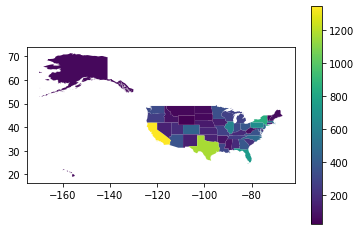

In [337]:
merged_gdf.plot(column='count', legend=True)

Most of the jobs are in California and Texas